In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Loading the diabetes dataset to pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
# Printing the first 5 rows of the dataset
print(diabetes_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Number of rows and columns in this dataset
print("Shape of the dataset:", diabetes_dataset.shape)


Shape of the dataset: (768, 9)


In [5]:
# Getting the statistical measures of the data
print(diabetes_dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
# Distribution of Outcome
print(diabetes_dataset['Outcome'].value_counts())
print(' 0 - non-diabetic \n 1- diabetic')

0    500
1    268
Name: Outcome, dtype: int64
 0 - non-diabetic 
 1- diabetic


In [7]:
# Group by Outcome and get the mean for all columns
print(diabetes_dataset.groupby('Outcome').mean())

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


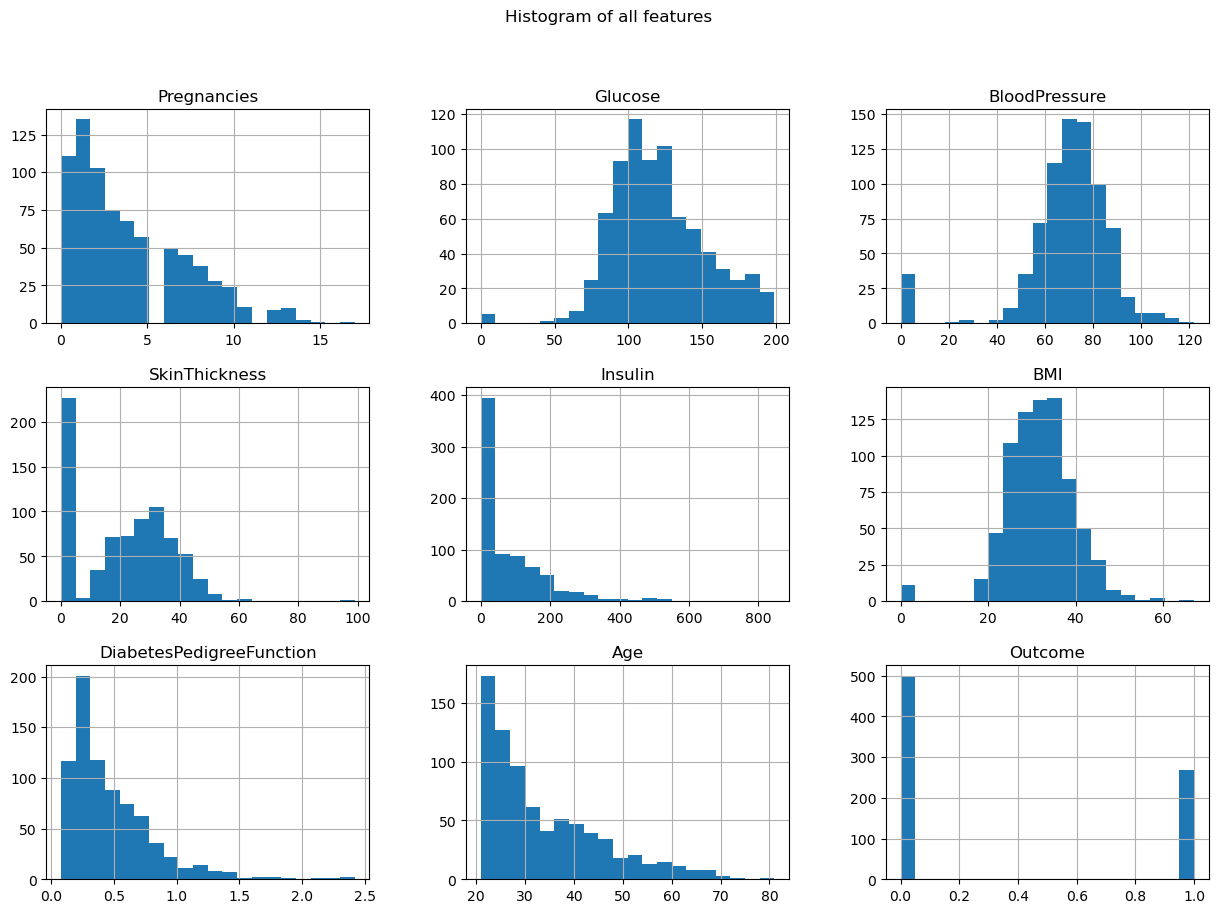

In [8]:
# Visualizing the distribution of each feature
diabetes_dataset.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of all features")
plt.show()

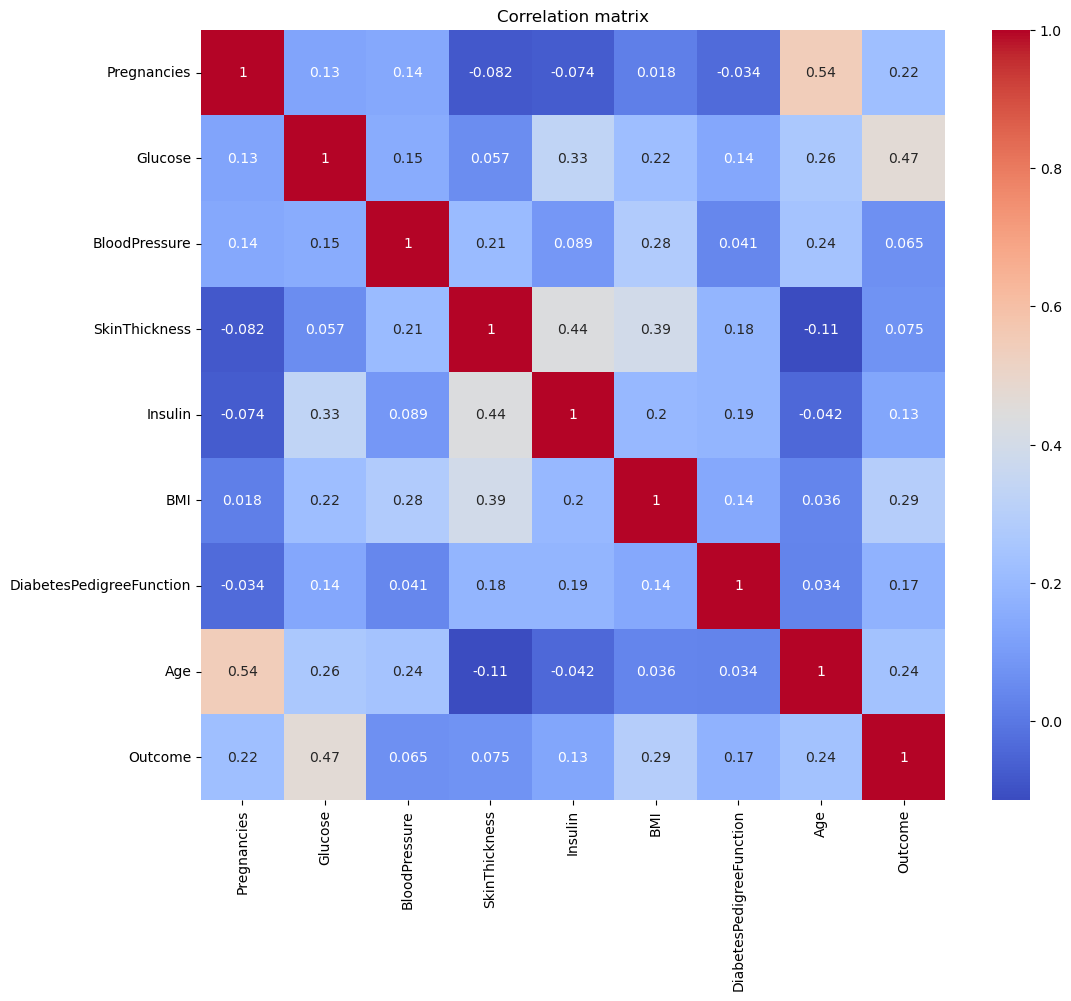

In [9]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

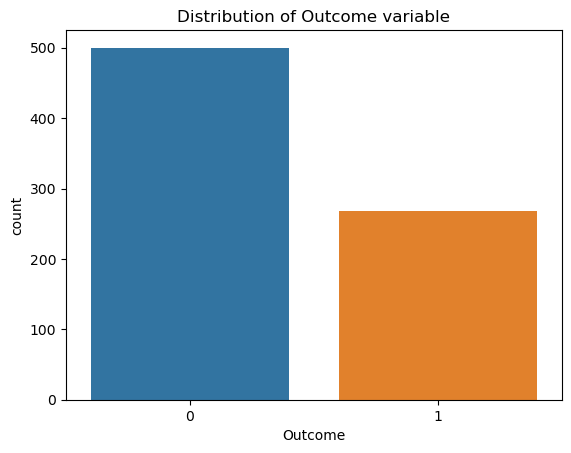

In [10]:
# Visualizing the distribution of the Outcome variable
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title("Distribution of Outcome variable")
plt.show()

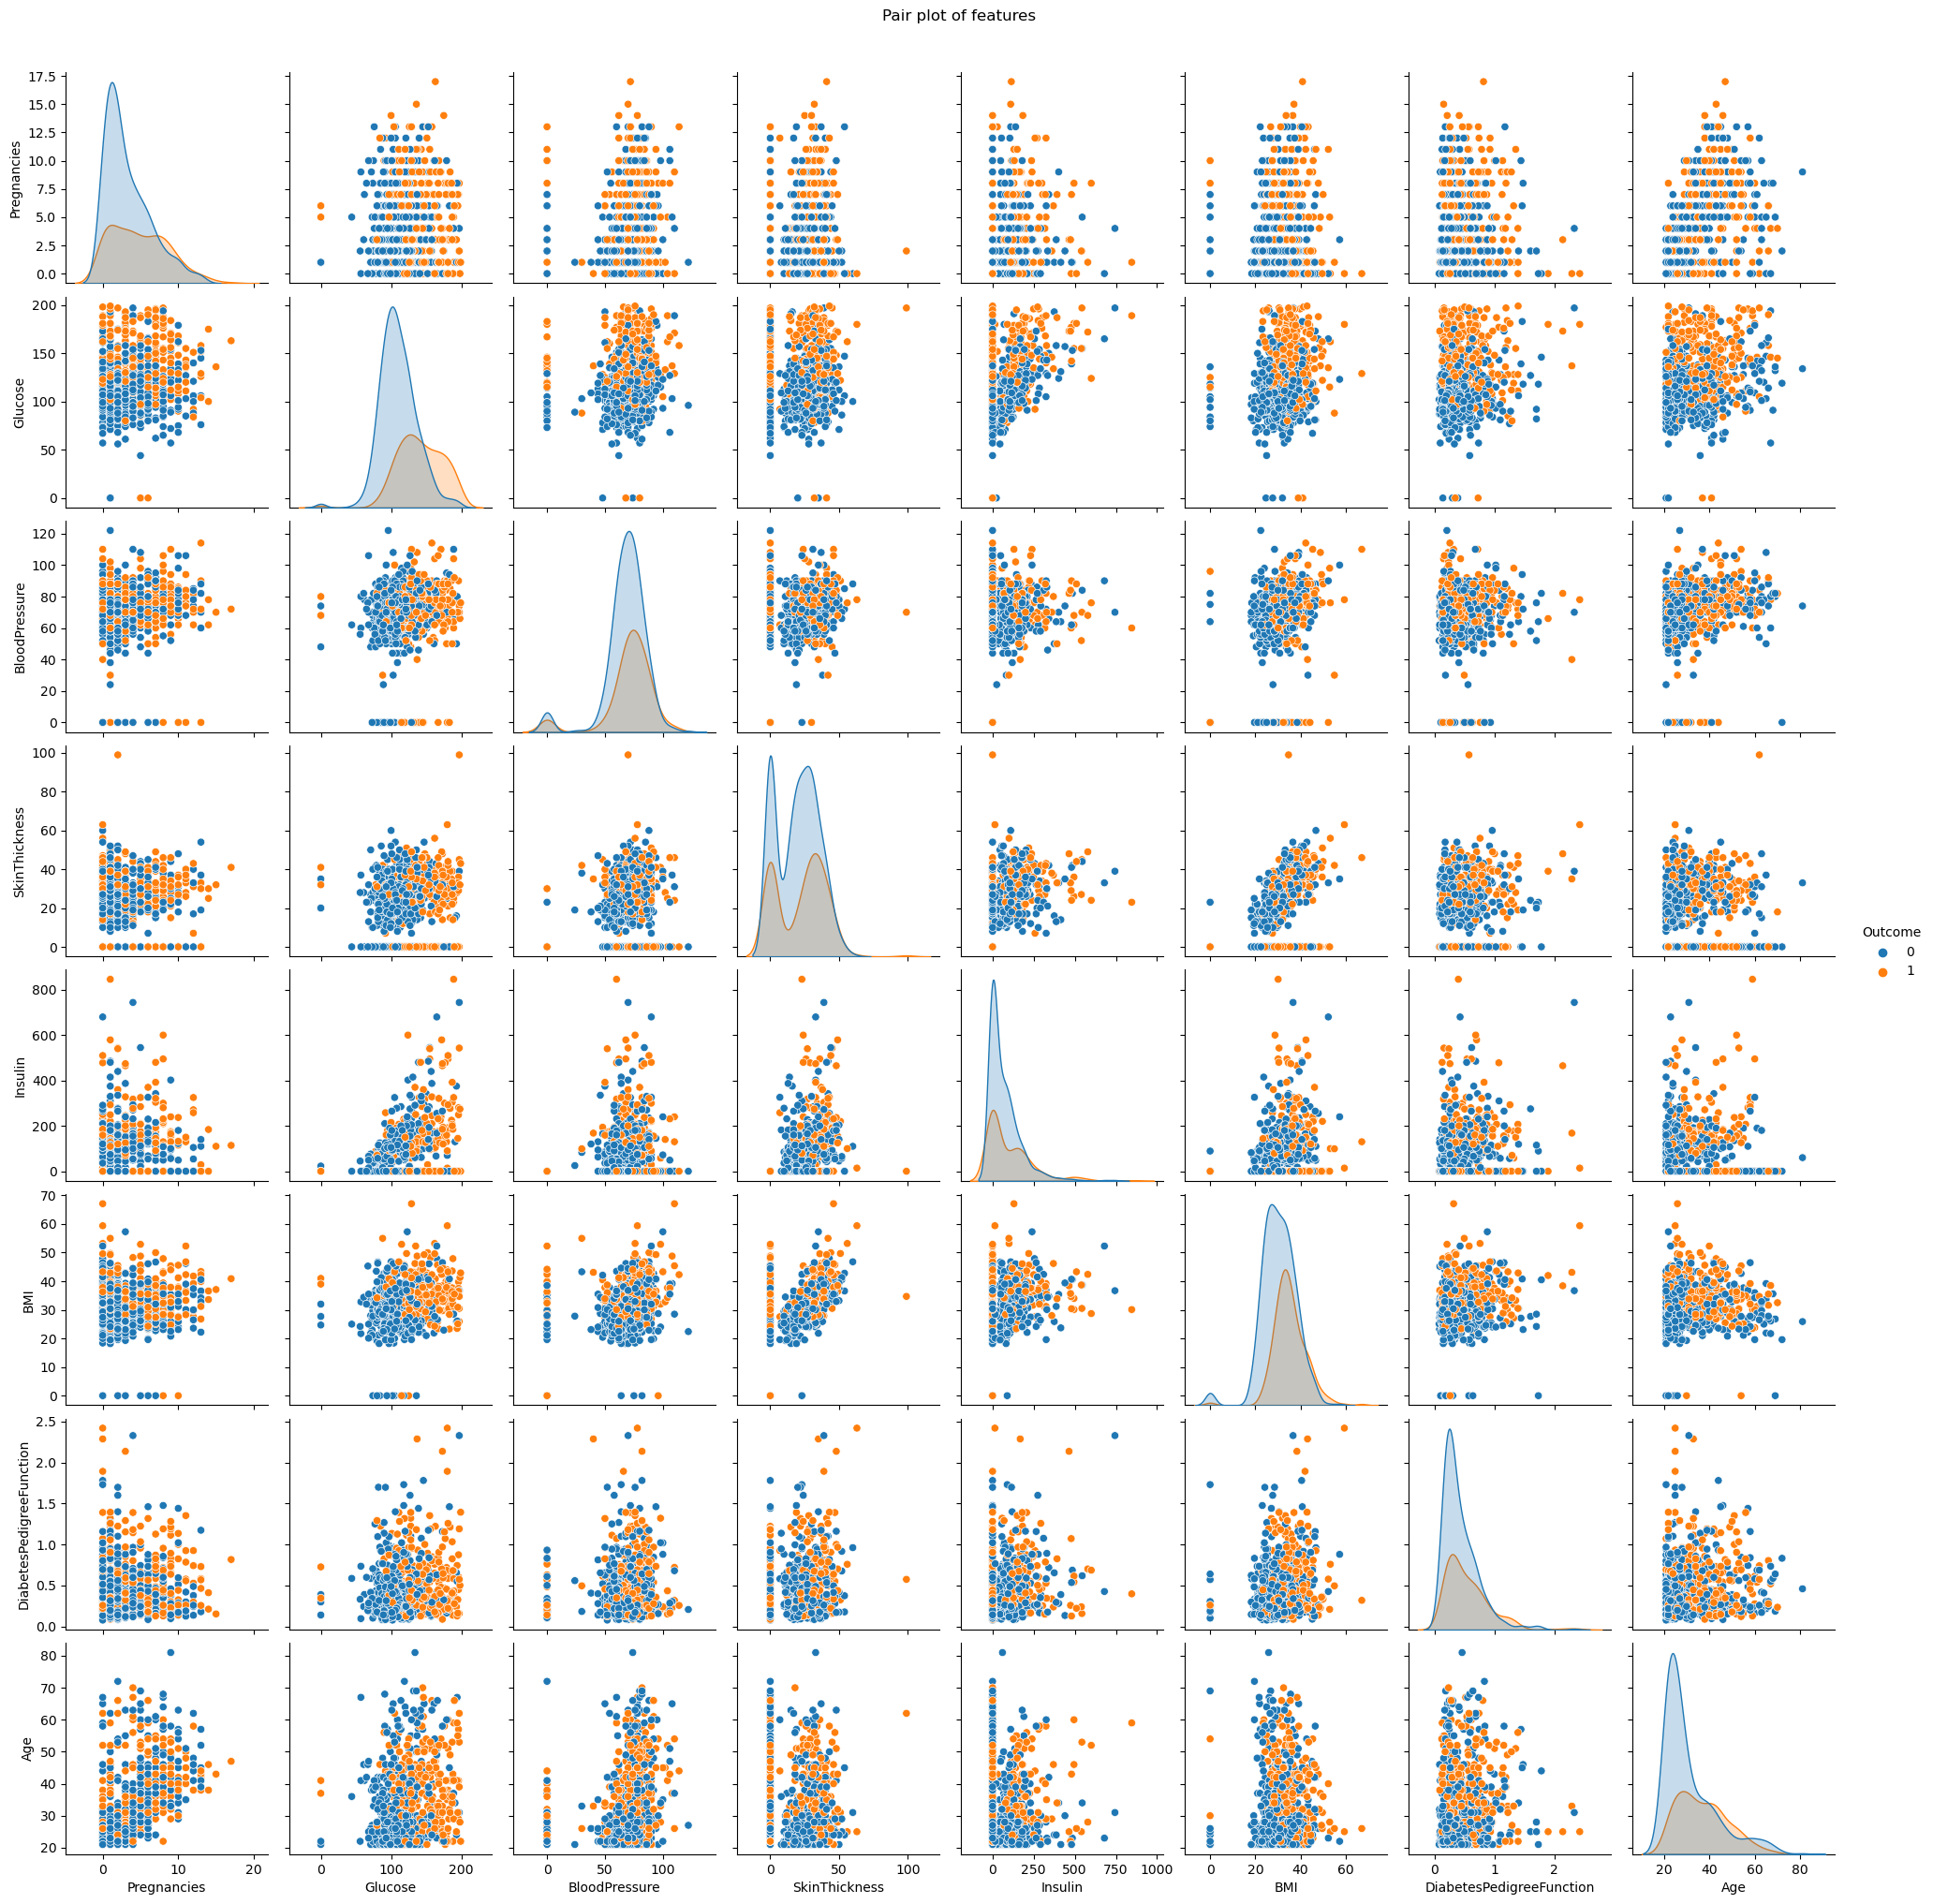

In [11]:
# Visualizing pair plots
sns.pairplot(diabetes_dataset, hue='Outcome')
plt.suptitle("Pair plot of features", y=1.02)
plt.show()

In [12]:
# Separating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [15]:
X = standardized_data
Y = diabetes_dataset['Outcome']


In [16]:
print(X)
print(Y)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [17]:
# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [18]:
# Training the model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
# Model Evaluation
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [20]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


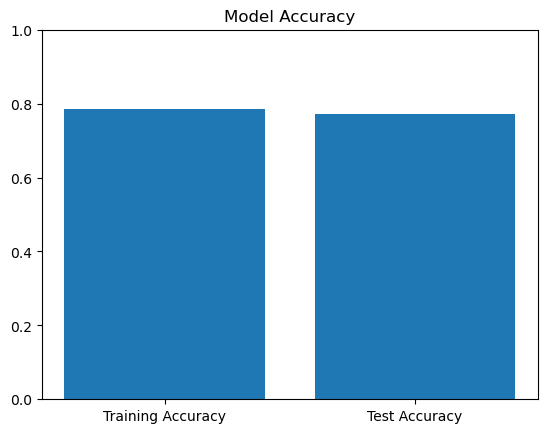

In [21]:
# Visualizing the accuracy scores
scores = {'Training Accuracy': training_data_accuracy, 'Test Accuracy': test_data_accuracy}
names = list(scores.keys())
values = list(scores.values())
plt.bar(names, values)
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.show()

In [22]:
# Make a Predictive system
input_data = (5, 78, 48, 0, 0, 33.7, 0.654, 25)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.3429808  -1.34247638 -1.09110524 -1.28821221 -0.69289057  0.2167047
   0.55003518 -0.70119842]]


C:\Users\jayam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
prediction = classifier.predict(std_data)
print(prediction)

[0]


In [24]:
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is not diabetic
